In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [12]:
train_dataset = 'C:\\Users\\rmct2\\OneDrive - Sri Lanka Institute of Information Technology\\Desktop\\SLIIT\\Y3S1\\MLOM lab\\Cat&Dog Dataset\\Training_data'
test_dataset = 'C:\\Users\\rmct2\\OneDrive - Sri Lanka Institute of Information Technology\\Desktop\\SLIIT\\Y3S1\\MLOM lab\\Cat&Dog Dataset\\Testing_data'

In [13]:
model = tf.keras.models.Sequential([
    #first convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #second convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    #third convolution
    tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    #fourth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    #fifth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    #flatten the result to feed into DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512,activation='relu'),
    #Only i output neuron. It will contain a value from 0-1 where 0 for class('Cat') and 1 for (;'Dog')
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 147, 147, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 71, 71, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 33, 33, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,669,489 (6.37 MB)

 Trainable params: 1,669,489 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [16]:
#All train image will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128 using train_datagen generator
train_datagen = train_datagen.flow_from_directory(train_dataset,#This is the source directory for training images
                                                 target_size = (300,300),#All images will be resized to 150x150
                                                 batch_size = 32,
                                                 #Since we use binary_crossentropy loss, we need binary labels
                                                 class_mode = 'binary')

#All test umages will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)
#apply predefined sepecification to test dataset
test_set = test_datagen.flow_from_directory(test_dataset,
                                           target_size = (300,300),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [17]:
history = model.fit(train_datagen,validation_data=test_set,steps_per_epoch = 8,epochs=10)

Epoch 1/10


C:\Users\rmct2\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5048 - loss: 0.6746 - val_accuracy: 0.5000 - val_loss: 0.6993
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 890ms/step - accuracy: 0.6532 - loss: 0.6451 - val_accuracy: 0.5000 - val_loss: 0.6830
Epoch 3/10
4/8 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.5677 - loss: 0.6635

C:\Users\rmct2\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 698ms/step - accuracy: 0.5690 - loss: 0.6653 - val_accuracy: 0.5000 - val_loss: 0.6837
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 985ms/step - accuracy: 0.6477 - loss: 0.6504 - val_accuracy: 0.5000 - val_loss: 0.7191
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 883ms/step - accuracy: 0.5604 - loss: 0.6793 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.6449 - loss: 0.6379 - val_accuracy: 0.5500 - val_loss: 0.6778
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 885ms/step - accuracy: 0.6825 - loss: 0.6273 - val_accuracy: 0.6350 - val_loss: 0.6708
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 707ms/step - accuracy: 0.5923 - loss: 0.6653 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.6673 - loss: 0.5922 - val_accuracy: 0.5000 - val_loss: 0.7292
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6075 - loss: 0.6205 - val_accuracy: 0.5500 - val_loss: 0.6819


In [20]:
save_path = "C:\\Users\\rmct2\\OneDrive - Sri Lanka Institute of Information Technology\\Desktop\\SLIIT\\Y3S1\\MLOM lab"
model.save_weights(os.path.join(save_path,"first_try_new.weights.h5"))

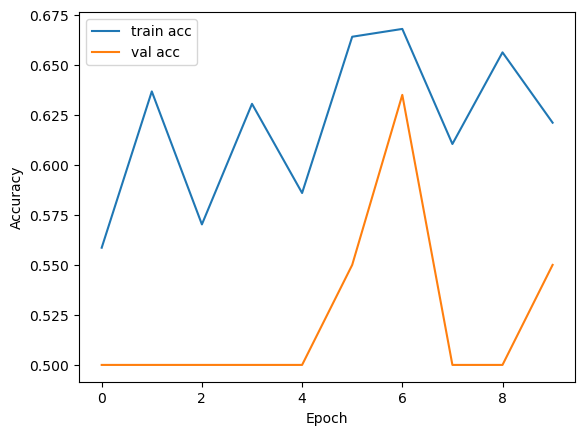

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

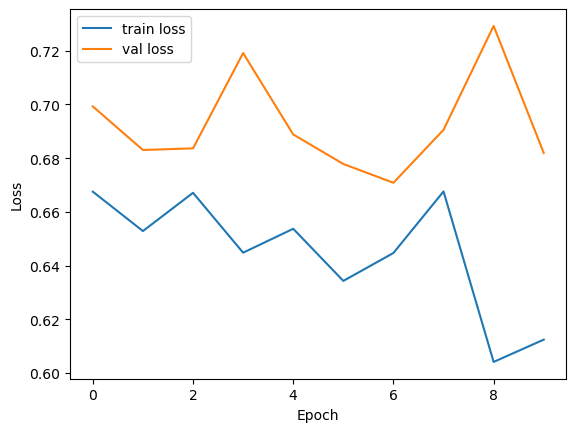

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')